In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [154]:
ad_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [155]:
ad_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [156]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [157]:
ad_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [158]:
##data cleaning and removing some irrelevant columns

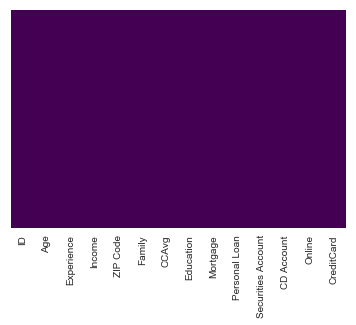

In [159]:
sns.heatmap(ad_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [160]:
## so there are  no null values 

In [161]:
ad_data['Experience'].corr(ad_data["Age"]) ## now we are finding the correlation between age and experience

0.9942148569683319

In [162]:
## as we got corr value very high we will drop experience column inorder to avoid disturbances while creating model
## any way ID column is useless so we will remove it 

In [163]:
ad_data = ad_data.drop(["ID","Experience"],axis=1)

In [164]:
ad_data.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


3)EDA:

In [165]:
##COUNT OFUNIQUE VALUES FOR EVERY COLUMN  IN THE DATA SET
ad_data.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [166]:
## WE KNOW THAT ZIP CODE IS A CATEGORICAL VARIABLE AND HERE UNIQUE CUNT OF ZIP CODE IS MORE SO ITS BETTER TO DROP IT
ad_data=ad_data.drop('ZIP Code',axis=1)


In [167]:
# to know the count of zero values for mortgage and cc avg
[(ad_data['Mortgage']==0).sum(),(ad_data['CCAvg']==0).sum()]

[3462, 106]

In [168]:
cols=['Family','Education','Securities Account','CD Account','Online']
for i in cols:
    print(ad_data[i].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64


Text(0.5, 0, 'Age')

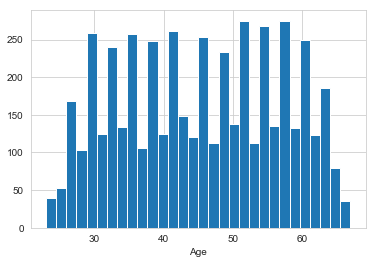

In [169]:
#univariate analysis
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

Text(0.5, 0, 'Income')

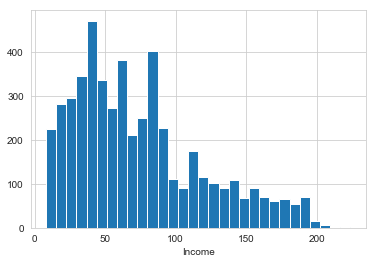

In [170]:
ad_data['Income'].hist(bins=30)
plt.xlabel('Income')

Text(0.5, 0, 'CCAvg')

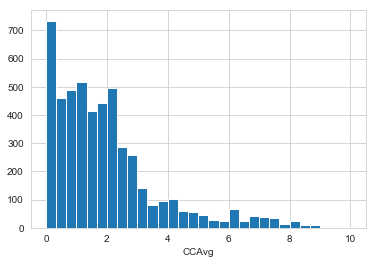

In [171]:
ad_data['CCAvg'].hist(bins=30)
plt.xlabel('CCAvg')

Text(0.5, 0, 'Mortgage')

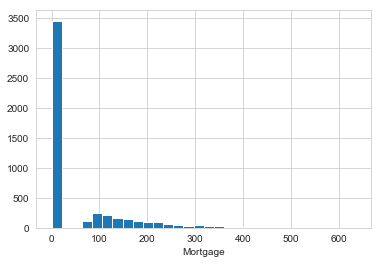

In [172]:
ad_data['Mortgage'].hist(bins=30)
plt.xlabel('Mortgage')

In [173]:
## SO WE NEED TO NORMALIZE THESE PLOTS TO FIT INTO THE MODEL OF LOGISTIC REGRESSION

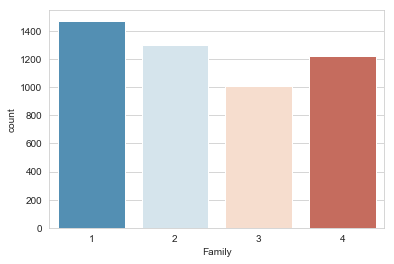

In [174]:
sns.countplot(x='Family',data=ad_data,palette='RdBu_r')

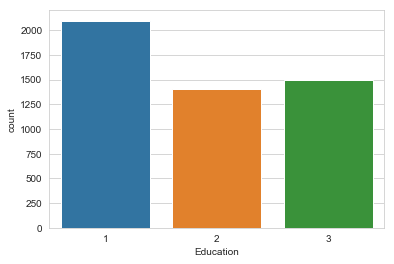

In [175]:
sns.countplot(x='Education',data=ad_data)

MULTI VARIATE ANALYSIS

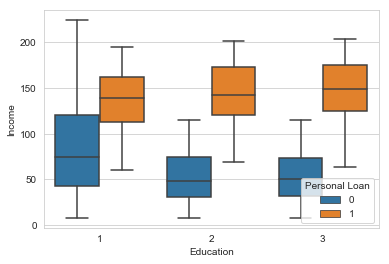

In [176]:
sns.boxplot(x='Education',y='Income',data=ad_data,hue='Personal Loan') 
## we will know which type of educated people with respected incomes are getting personal loan

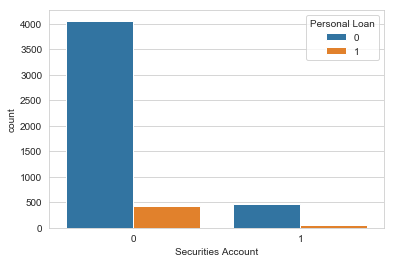

In [177]:
sns.countplot(x='Securities Account',data=ad_data,hue='Personal Loan') 
## it shows that majority of secured accounts dont have personal loan

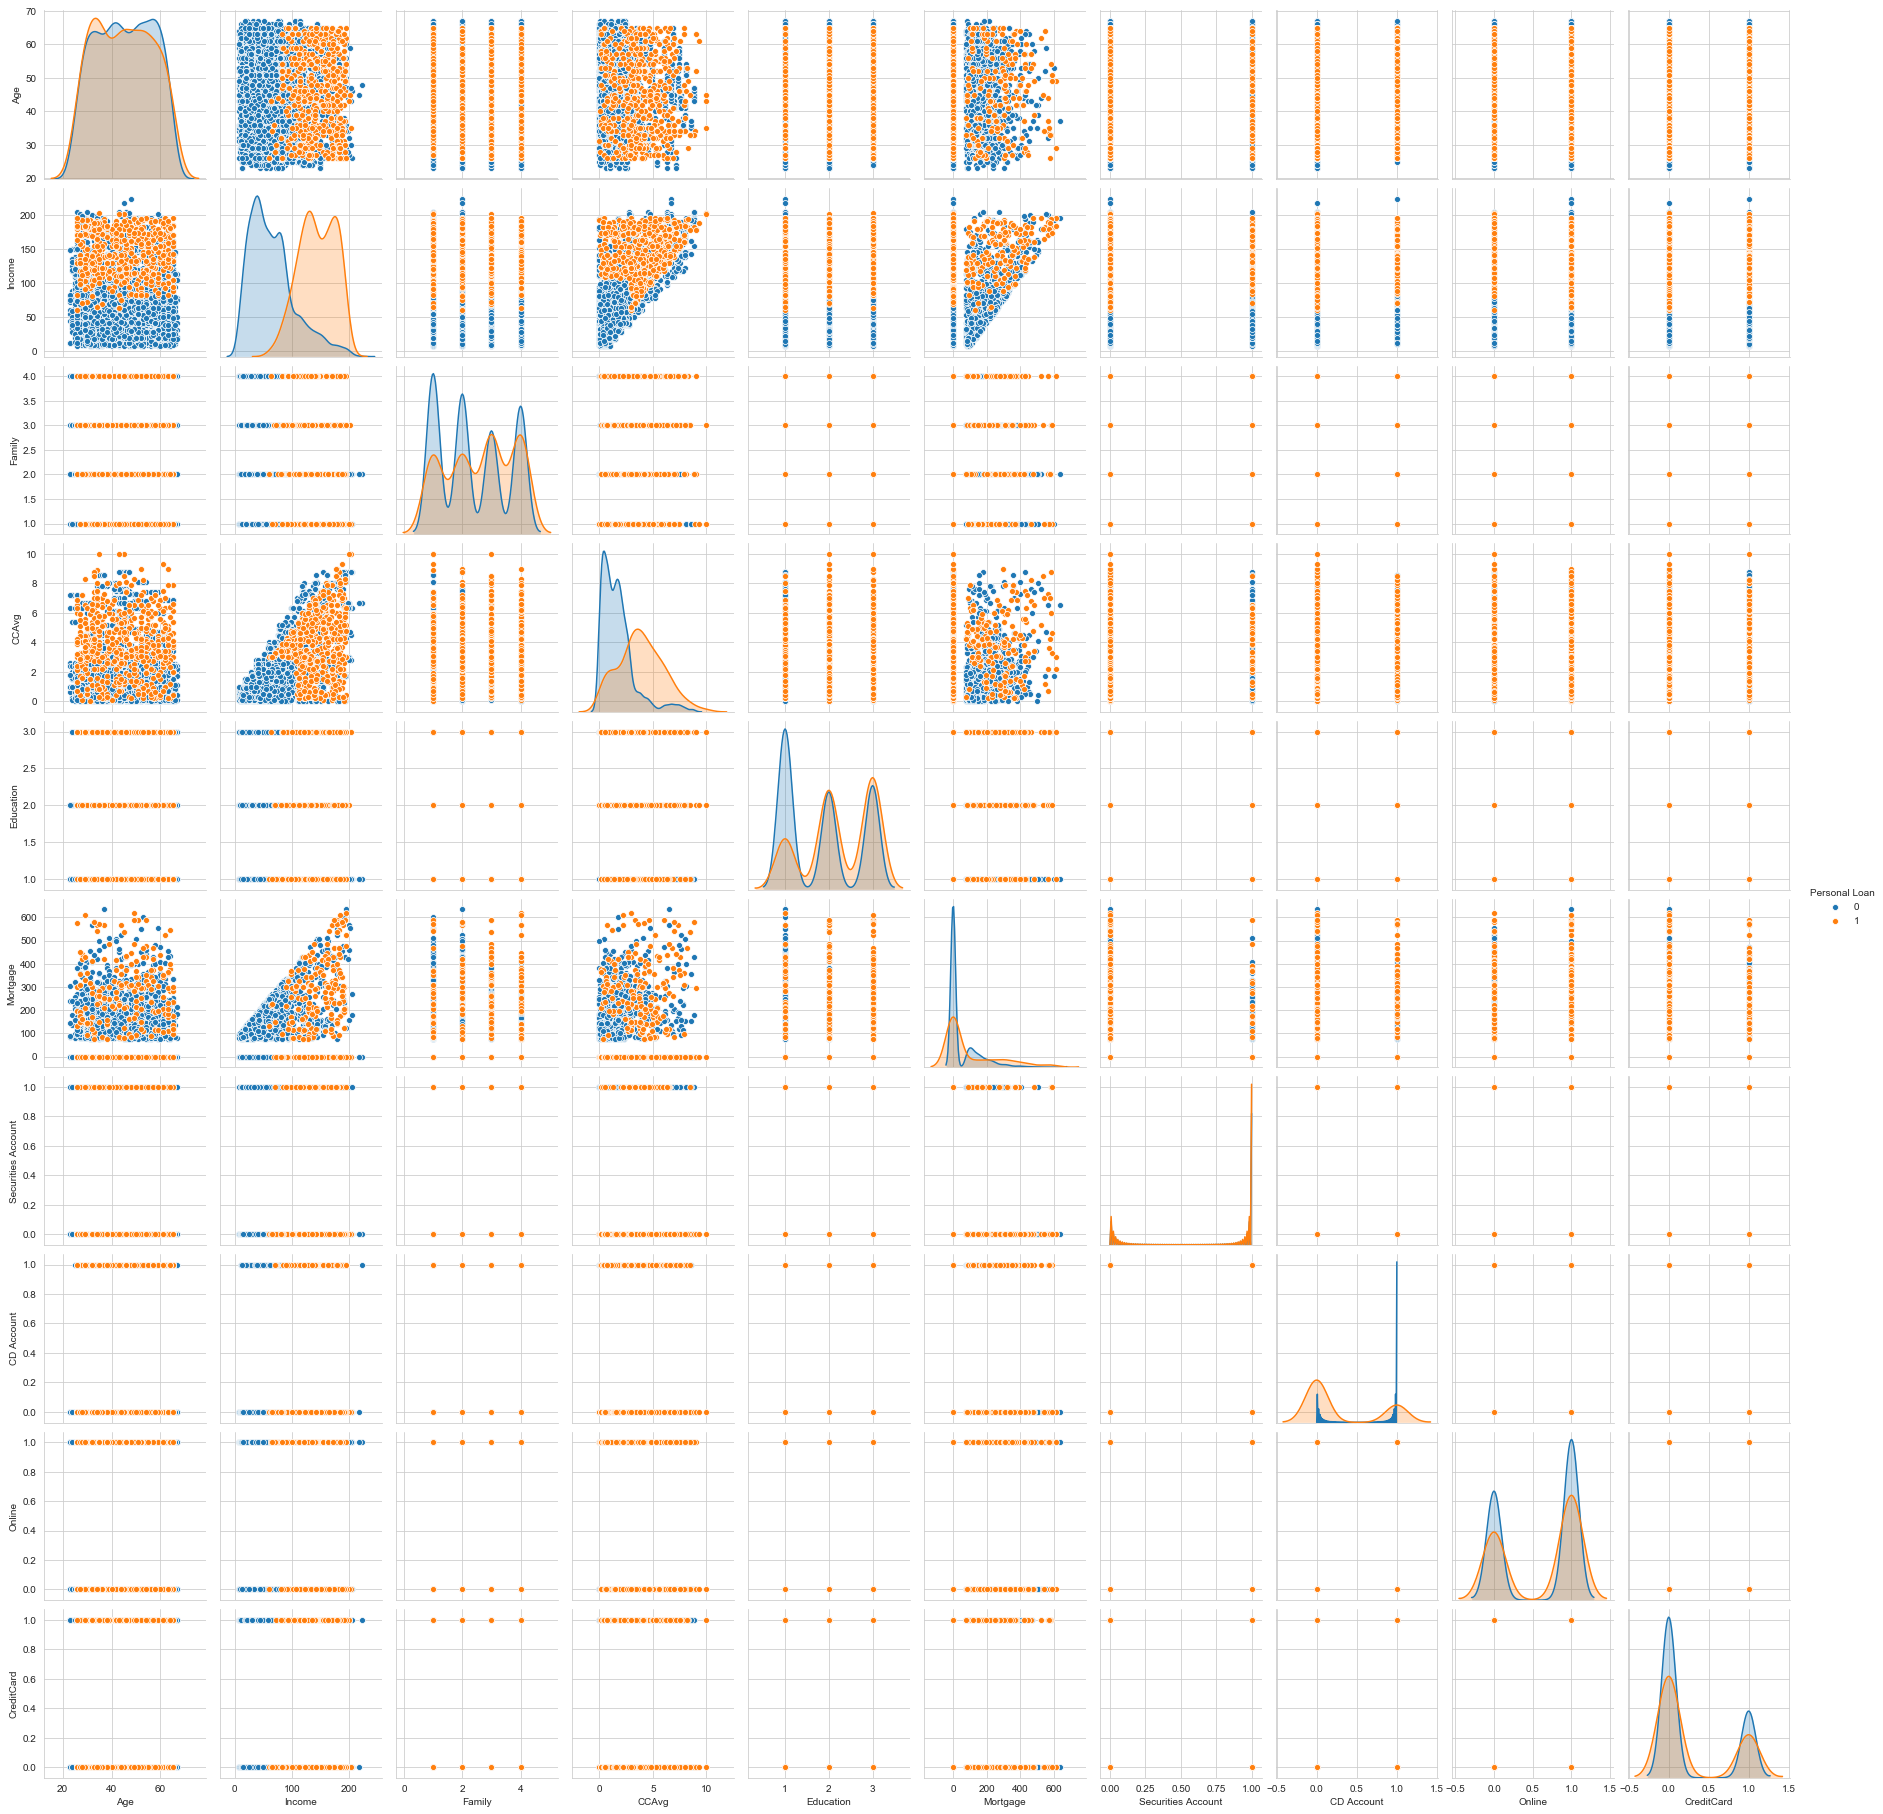

In [178]:
sns.pairplot(ad_data,hue= 'Personal Loan')

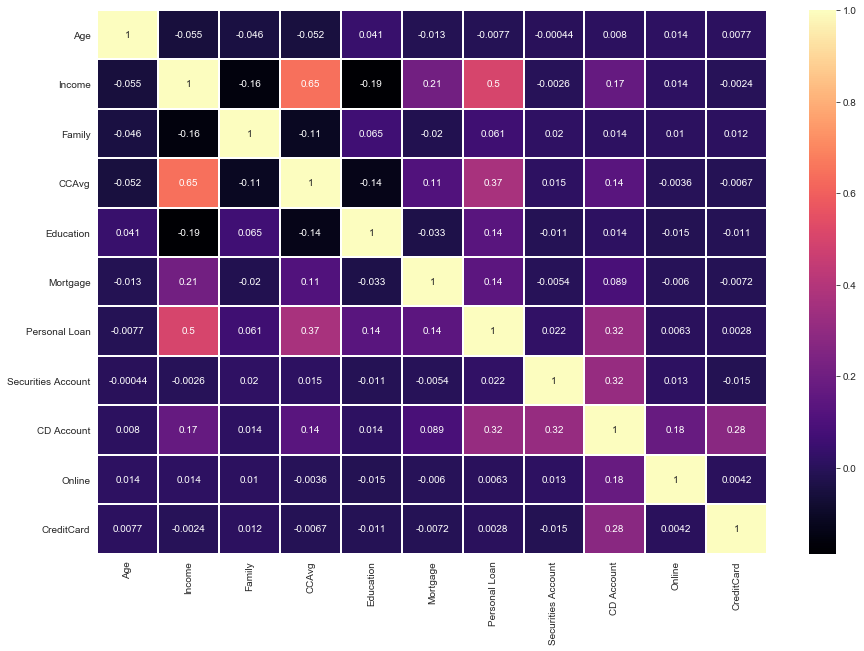

In [179]:
fig,ax=plt.subplots(figsize=(15,10))# to know thw correlation between the variables 
sns.heatmap(ad_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

transformations to normalize

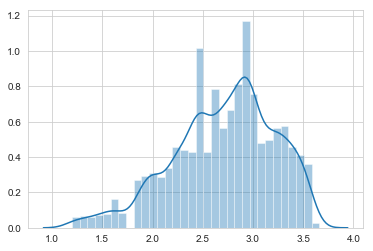

In [180]:
## Income graph is actually skewed at first so now we are using box-cox power tranformation method
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'box-cox',standardize= False)
ad_data['Income']= pt.fit_transform(ad_data['Income'].values.reshape(-1,1))
t= pt.transform(ad_data['Income'].values.reshape(-1,1))
sns.distplot(t) ## by transforming it looks normalized now we are good to go

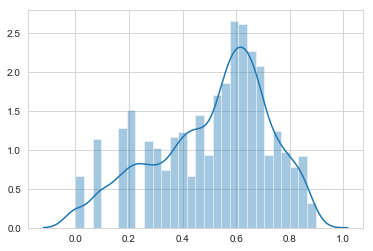

In [181]:
## same way CCavg is also skewd at first  and  i am using yeo - johnson power transformer method
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson',standardize= False)
ad_data['CCAvg']= pt.fit_transform(ad_data['CCAvg'].values.reshape(-1,1))
t= pt.transform(ad_data['CCAvg'].values.reshape(-1,1))
sns.distplot(t) ## by transforming it looks normalized now we are good to go

In [182]:
## actually first i did  power transformation but it did nt give good results. 
ad_data['Mortgagevalues'] = pd.cut(ad_data['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
ad_data.drop('Mortgage',axis=1,inplace=True)

In [183]:
ad_data.head()

,Age,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgagevalues
0,25,6.994487,4,0.845160,1,0,1,0,0,0,0
1,45,5.974230,3,0.814478,1,0,1,0,0,0,0
2,39,3.402765,1,0.633777,1,0,0,0,0,0,0
3,35,9.309254,1,1.107427,2,0,0,0,0,0,0
4,35,6.747451,4,0.633777,2,0,0,0,0,1,0


In [184]:

X= ad_data[['Age', 'Income', 'Family', 'CCAvg', 'Education','Securities Account', 'CD Account', 'Online',
       'CreditCard','Mortgagevalues']]
y = ad_data['Personal Loan']

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,stratify=y, random_state = 101)

In [186]:
# FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

LOGISTIC REGRESSION 

In [187]:
## MODEL FITTING AND TRAINING THE VALUES TO THE MODEL
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train, y_train)
# Predicting the Train set results(just for comparison between train and test predictions)
trpred1 = logreg.predict(X_train)
# Predicting the Test set results
y_pred1 = logreg.predict(X_test)
# BY USIG SOME METRICS WE WILL KNOW THE ACCURACY OF THE MODEL SO HERE WE ARE USING CONFUSION MATRIX AND ALSO CLASSIFICATION REPORT
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred1))
print('\n')
print(classification_report(y_test,y_pred1))
print('\n')
trscore1 = accuracy_score(y_train,trpred1)
score1 = accuracy_score(y_test,y_pred1)
print(trscore4)
print('\n')
print(score1)

[[1340   16]
 [  50   94]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.85      0.65      0.74       144

    accuracy                           0.96      1500
   macro avg       0.91      0.82      0.86      1500
weighted avg       0.95      0.96      0.95      1500



0.9865714285714285


0.956


C:\Users\NGST\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


let us do with the other classification algorithms
I am using k-nn , decision tree, random forest 

K-NN CLASSIFICATION ( USING BEST K VALUE)

In [247]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
trpred2 = knn.predict(X_train)
y_pred2 = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred2))
print('\n')
print(classification_report(y_test,y_pred2))
print('\n')
trscore2= accuracy_score(y_train,trpred2)
score2 = accuracy_score(y_test,y_pred2)
print(trscore4)
print('\n')
print(score2)
# FOR CHOOSING A K VALUE TO GET ACCURACY
error_rate = []
# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

[[1339   17]
 [  45   99]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.85      0.69      0.76       144

    accuracy                           0.96      1500
   macro avg       0.91      0.84      0.87      1500
weighted avg       0.96      0.96      0.96      1500



0.9988571428571429


0.9586666666666667


Text(0, 0.5, 'Error Rate')

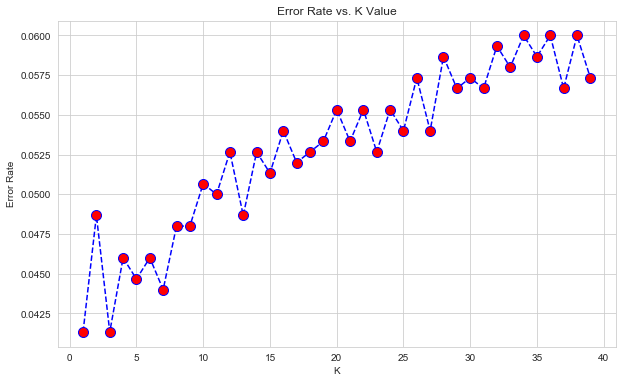

In [189]:
#ploting the error rate vs Kvalue for KNN 
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

DECISION TREE CLASSIFICATION 

In [242]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0,max_depth=5)
dtree.fit(X_train,y_train)
y_pred3 = dtree.predict(X_test)
trpred3=dtree.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred3))
print('\n')
print(classification_report(y_test,y_pred3))
print('\n')
trscore3= accuracy_score(y_train,trpred3)
score3 = accuracy_score(y_test,y_pred3)
print(trscore4)
print('\n')
print(score3)

[[1345   11]
 [  17  127]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.92      0.88      0.90       144

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



0.9988571428571429


0.9813333333333333


RANDOM FOREST CLASSIFICATION

In [224]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0,n_estimators=700,max_depth=10)
rfc.fit(X_train, y_train)
y_pred4 = rfc.predict(X_test)
trpred4=rfc.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred4))
print('\n')
print(classification_report(y_test,y_pred4))
print('\n')
trscore4= accuracy_score(y_train,trpred4)
score4 = accuracy_score(y_test,y_pred4)
print(trscore4)
print('\n')
print(score4)

[[1351    5]
 [  17  127]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.96      0.88      0.92       144

    accuracy                           0.99      1500
   macro avg       0.97      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



0.9988571428571429


0.9853333333333333


for visualizing the confusion matrix for every model we built

In [209]:
def draw_cm(actual , predicted):
    cm= confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,xticklabels=[0,1],yticklabels=[0,1],fmt='.2f',linecolor='white',linewidths=1,cmap='magma')
    plt.xlabel('predicted')
    plt.ylabel('observed')

CONFUSION MATRIX FOR LOGISTIC REGRESSION

confusion matrix for logistic regression


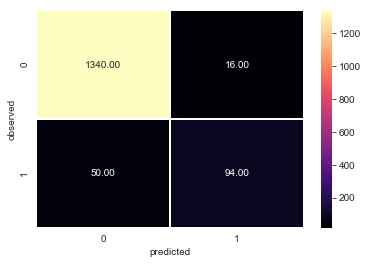

In [210]:
print('confusion matrix for logistic regression')
draw_cm(y_test,y_pred1)

CONFUSION MATRIX FOR K-NN

confusion matrix for K-NN


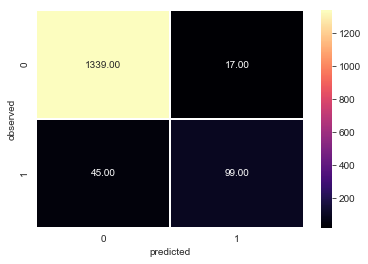

In [248]:
print('confusion matrix for K-NN')
draw_cm(y_test,y_pred2)

CONFUSION MATRIX FOR DECISION TREES

confusion matrix for DTREES


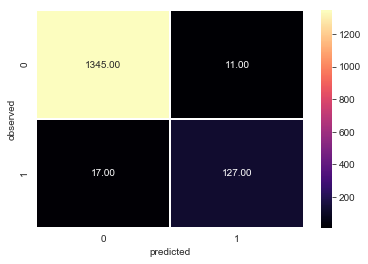

In [243]:
print('confusion matrix for DTREES')
draw_cm(y_test,y_pred3)

CONFUSION MATRIX FOR RANDOM FOREST

confusion matrix for RF


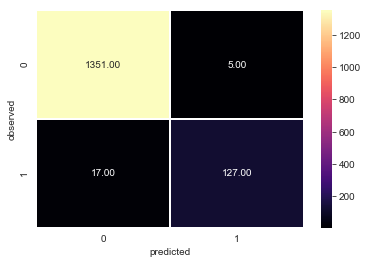

In [225]:
print('confusion matrix for RF')
draw_cm(y_test,y_pred4)